In [1]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
transactions_im = pd.read_csv('transactions_cluster1.csv', header=0)

In [3]:
transactions = transactions_im.fillna(0)

In [4]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')
transactions = transactions.set_index('date')

In [5]:
ts = transactions.mean(axis=1)

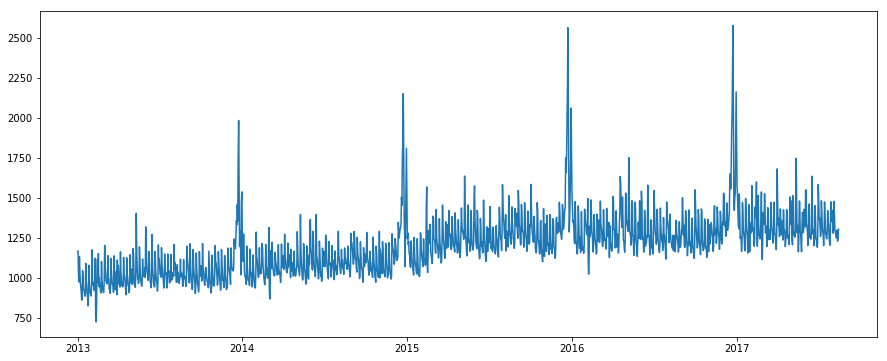

In [6]:
plt.plot(ts.index.to_pydatetime(), ts.values)

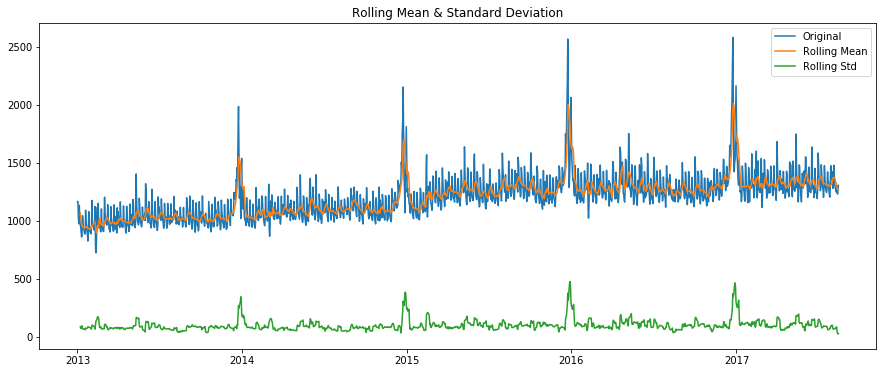

In [7]:
rolmean = ts.rolling(window=7).mean()
rolstd = ts.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-3.69559042566
P Value: 		0.00417560801045
Lags Used: 		25
Observations: 		1662
Critical Value 1%: 	-3.43429069112
Critical Value 5%: 	-2.86328059087
Critical Value 10%: 	-2.5676966487
Information Criterion: 	19081.279145


In [9]:
ts_log = np.log(ts)

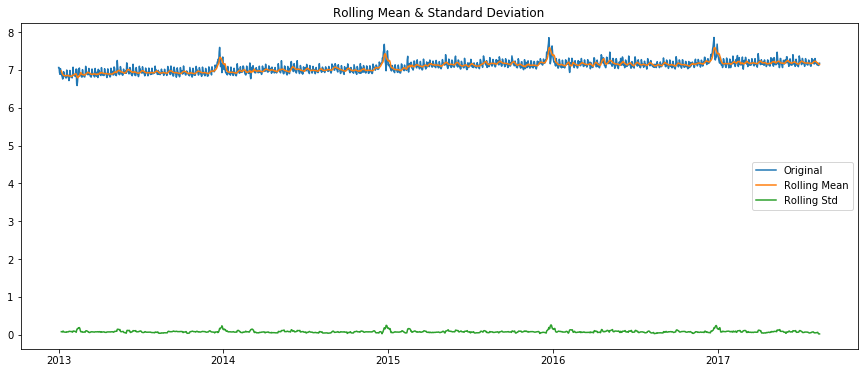

In [10]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [11]:
test = adfuller(ts_log, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-3.37939930245
P Value: 		0.0116815185228
Lags Used: 		25
Observations: 		1662
Critical Value 1%: 	-3.43429069112
Critical Value 5%: 	-2.86328059087
Critical Value 10%: 	-2.5676966487
Information Criterion: 	-4877.94067436


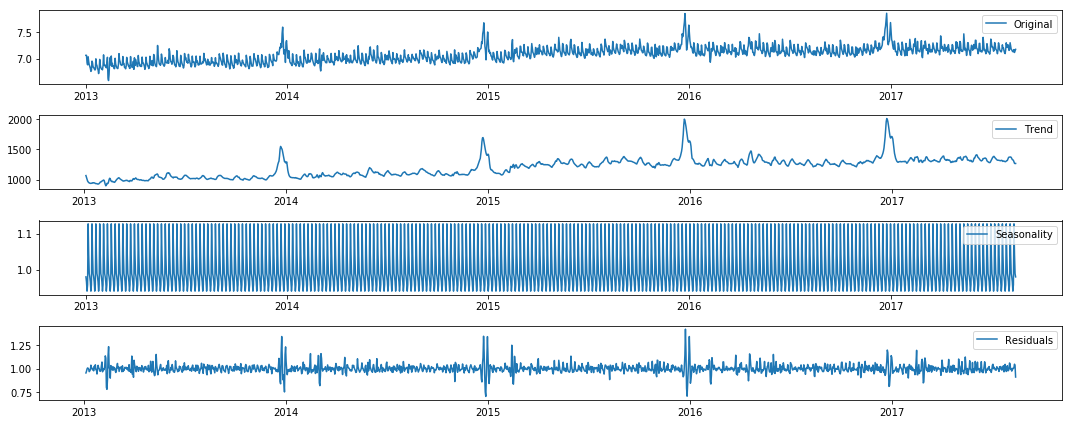

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

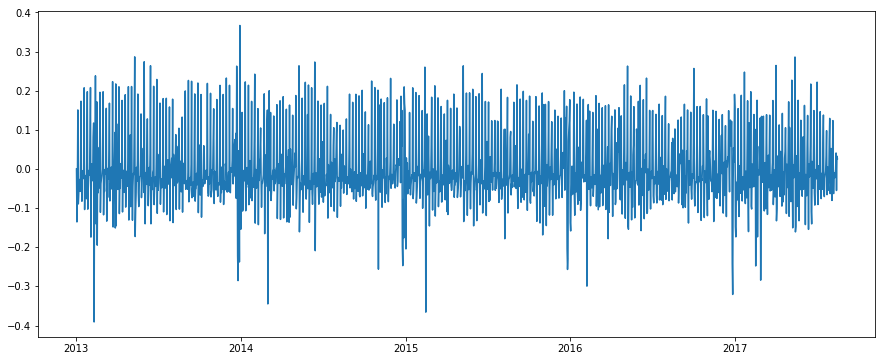

In [13]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)

In [14]:
ts_log_diff.dropna(inplace=True)

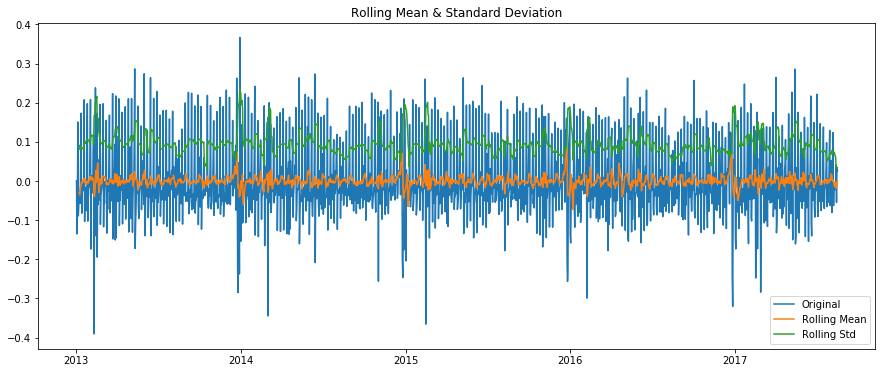

In [15]:
rolmean = ts_log_diff.rolling(window=7).mean()
rolstd = ts_log_diff.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [16]:
test = adfuller(ts_log_diff, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-11.6401075443
P Value: 		2.15718401458e-21
Lags Used: 		25
Observations: 		1661
Critical Value 1%: 	-3.43429306728
Critical Value 5%: 	-2.86328163972
Critical Value 10%: 	-2.56769720719
Information Criterion: 	-4890.36489331


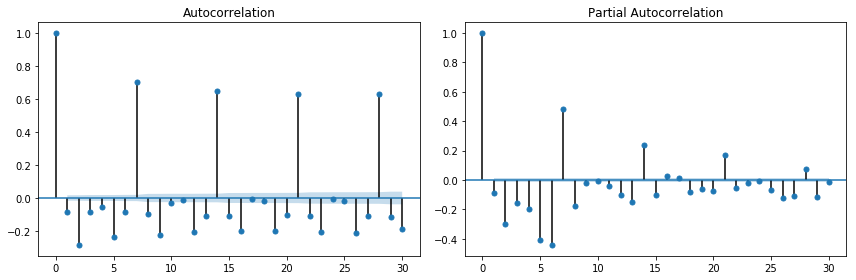

In [17]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

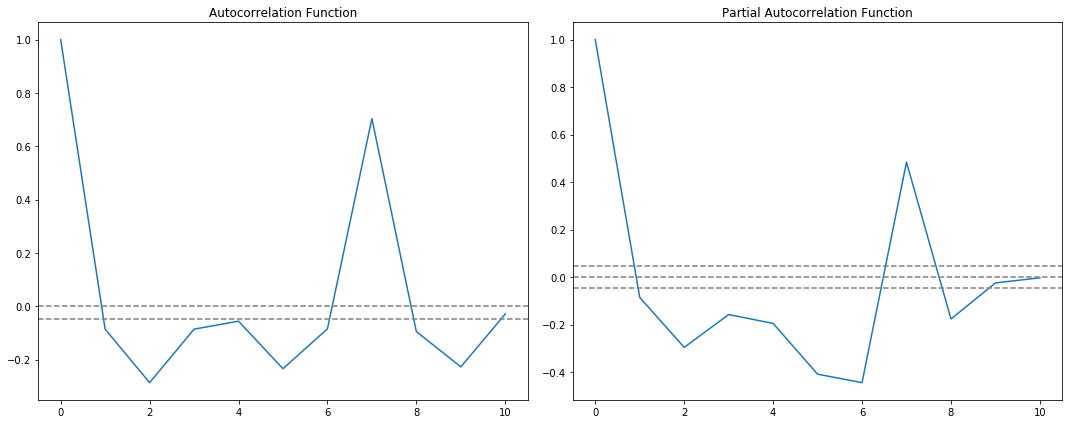

In [18]:
#ACF and PACF plots

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [19]:
train_size = int(len(ts_log_diff) * 0.7)
test_size = len(ts_log_diff) - train_size
train, test = ts_log_diff[ts_log_diff.index[0].to_pydatetime():ts_log_diff.index[train_size].to_pydatetime()], ts_log_diff[ts_log_diff.index[train_size].to_pydatetime():ts_log_diff.index[len(ts_log_diff)-1].to_pydatetime()]
print(len(train), len(test))

1181 507


In [20]:
mod = sm.tsa.statespace.SARIMAX(ts_log_diff[:1181], trend='n', order=(2,2,1), seasonal_order=(2,2,1,12))
results = mod.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1181
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood                 577.039
Date:                            Thu, 14 Dec 2017   AIC                          -1140.079
Time:                                    19:16:09   BIC                          -1104.560
Sample:                                01-02-2013   HQIC                         -1126.689
                                     - 03-27-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6738      0.032    -20.977      0.000      -0.737      -0.611
ar.L2         -0.3566      0.030   

In [21]:
#predictions=results.predict(start=ts_log_diff.index[0].to_pydatetime(),end=ts_log_diff.index[1686].to_pydatetime(),dynamic=True)

In [22]:
from datetime import datetime, timedelta
format = '%Y-%m-%d'
a=datetime.strptime('2017-02-28',format)
b=datetime.strptime('2017-08-14',format)
predictions=results.predict(start=ts_log_diff.index[1150].to_pydatetime(),end=ts_log_diff.index[1686].to_pydatetime())

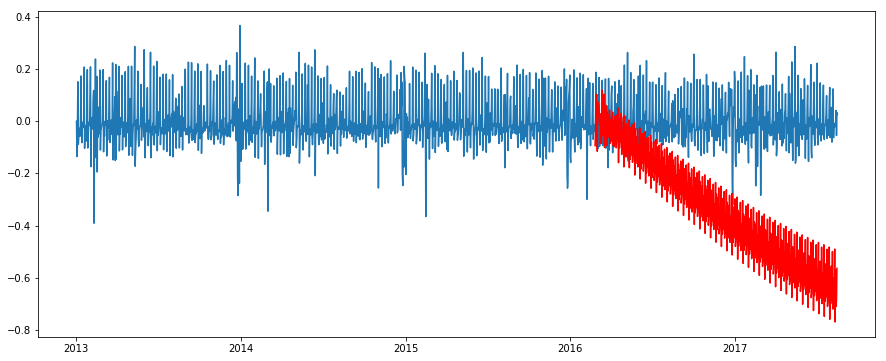

In [23]:
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)
plt.plot(ts_log_diff[1149:1686].index.to_pydatetime(), predictions, color='red')
#plt.title('RSS: %.4f'% sum(predictions-ts_log_diff[1150:1686])**2)

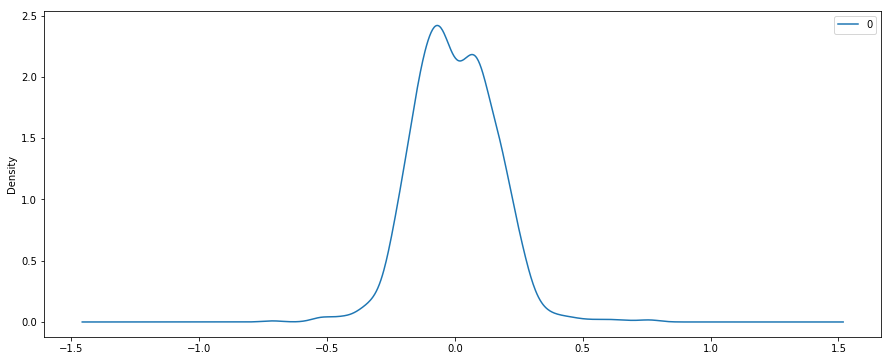

In [24]:
residuals = DataFrame(results.resid)
residuals.plot(kind='kde')

In [25]:
print(residuals.describe())

                 0
count  1181.000000
mean      0.000087
std       0.159155
min      -0.713499
25%      -0.111551
50%      -0.008150
75%       0.105692
max       0.774532


In [26]:
predictions_SARIMAX_diff = pd.Series(predictions, copy=True)
print(predictions_SARIMAX_diff.head())

2016-02-26   -0.093786
2016-02-27   -0.052570
2016-02-28    0.103415
2016-02-29    0.015507
2016-03-01    0.040805
Freq: D, dtype: float64


In [27]:
predictions_SARIMAX_diff_cumsum = predictions_SARIMAX_diff.cumsum()
predictions_SARIMAX_log = pd.Series(ts_log.iloc[0], index=ts_log.index[1150:1686])

In [28]:
predictions_SARIMAX_log = predictions_SARIMAX_log.add(predictions_SARIMAX_diff_cumsum,fill_value=0)

In [29]:
predictions_SARIMAX = np.exp(predictions_SARIMAX_log)

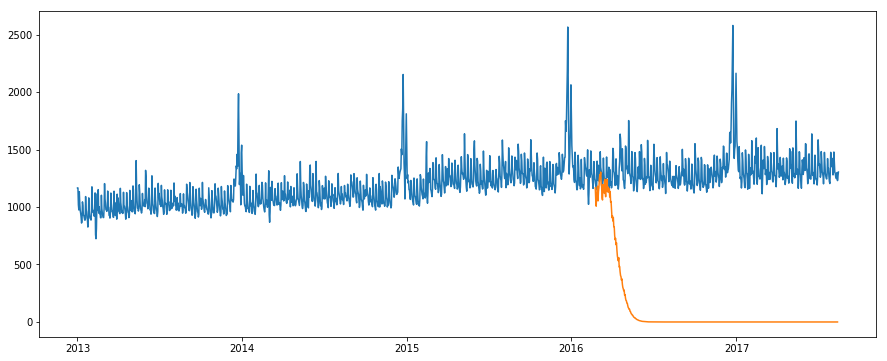

In [30]:
plt.plot(ts.index.to_pydatetime(), ts.values)
plt.plot(ts.index[1148:1686].to_pydatetime(), predictions_SARIMAX.values)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_SARIMAX-ts[1150:1686])**2)/len(ts[1150:1686])))

In [31]:
expected=list(ts)

In [32]:
bias=[expected[i+1148]-predictions_SARIMAX[i] for i in range(len(predictions_SARIMAX))]

In [33]:
mean_forcast_error=sum(bias)/len(bias)
print('Mean forcast error: %f' % mean_forcast_error)

Mean forcast error: 1206.384679


In [34]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected[1148:1686], predictions_SARIMAX)
print('MAE: %f' % mae)

MAE: 1206.675831
